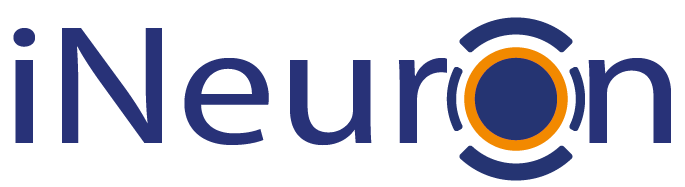

# Logistic Regression Practical Implementation of Algerian Forest Fire Prediction Dataset

**Submitted By:- Atanu Kundu**

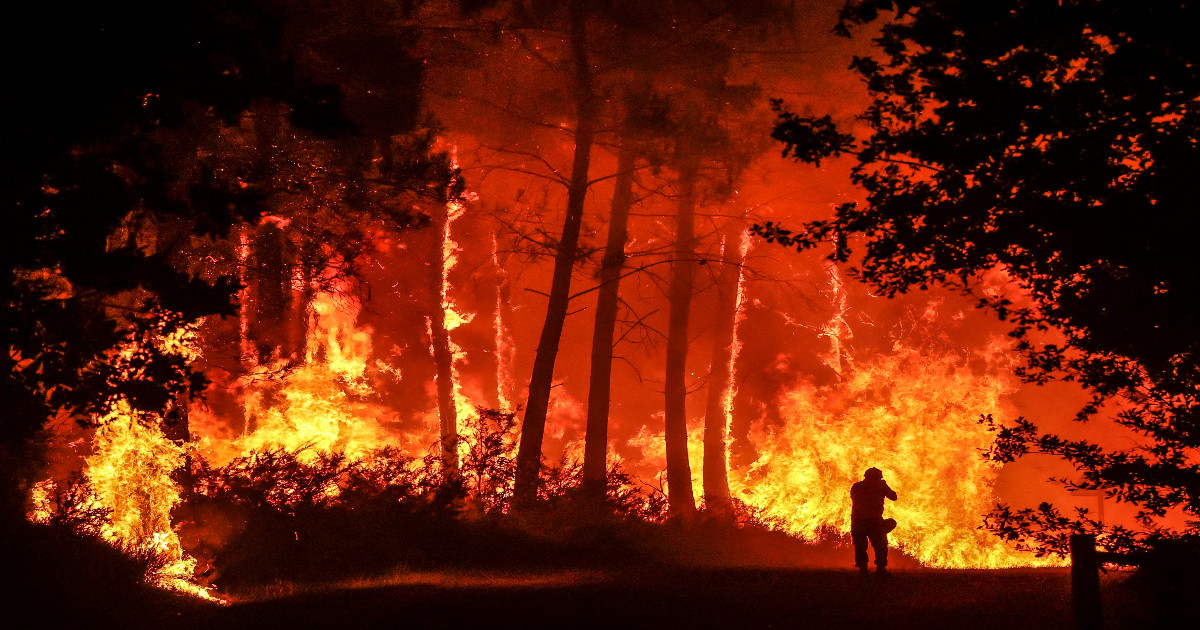

### EDA and Feature Engineering

1. Data Profiling
2. Data Cleaning
3. Statistical Analysis
4. Graphical Analysis
5. Data Scaling

### Logistic Regression Implementation

1. Logistic Regression on Original Dataset

2. Performance metrics for above model

3. Creating an imbalanced dataset from original dataset

4. Balancing the imbalanced Dataset

5. Logistic Regression on above dataset

6. Performance Metrics for above Dataset

7. Compairing the performance of Original balanced dataset and the balanced dataset that we create from an imbalanced one


### What is Logistic Regression?

Ans : Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

### Advantages of Logisitic Regression

1. It is very simple and easy to implement.

2. The output is more informative than other classification algorithms

3. It expresses the relationship between independent and dependent variables

4. Very effective with linearly seperable data

### Disadvantages of Logisitic Regression

1. Not effective with data which are not linearly seperable

2. Not as powerful as other classification models

3. Multiclass classifications are much easier to do with other algorithms than logisitic regression

4. It can only predict categorical outcomes 

## <span style='color:Green '> Importing required libraries</span>

In [3]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

## <span style='color:green '>Reading the Dataset</span>

In [6]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

### <span style='color:Green '>Info about dataset and its attributes</span>


1. The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for each region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (classes)
5. The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

### Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

In [9]:
# index 122, 123 need to be removed from dataset
df.iloc[121:].head(4)

day  month  year  Temperature   RH   Ws  Rain   \
121                             30     09  2012           25   78   14    1.4   
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    
124                             01     06  2012           32   71   12    0.7   

     FFMC  DMC   DC  ISI  BUI  FWI    Classes    
121    45  1.9  7.5  0.2  2.4  0.1  not fire     
122   NaN  NaN  NaN  NaN  NaN  NaN          NaN  
123  FFMC  DMC   DC  ISI  BUI  FWI    Classes    
124  57.1  2.5  8.2  0.6  2.8  0.2  not fire

## <span style='color:green'>Shape of The Dataset</span>

In [10]:
df.shape

(246, 14)

## <span style='color:green'>Dropping The Unwanted Rows And Columns</span>

In [11]:
## dropping rows having region name and header
df.drop([122,123],inplace=True) #dropping rows 122,123 from dataset
df.reset_index(inplace=True)

In [13]:
# dropping index feature
df.drop('index',axis=1,inplace=True)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

## <span style='color:Green '> Shape of the Dataset After dropping the features and rows </span>

In [14]:
df.shape

(244, 14)

### <span style='color:Green '>Creating Region feature</span>

In [15]:
## Creating feature called Region,add value 0 for Bejaia Region and add value 1 for Sidi Bel-abbes Region
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

df.iloc[120:].head(10)

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
120  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3     3   
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2   2.4   
122  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6   2.8   
123  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6   2.9   
124  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3   2.6   
125  04    06  2012          30  64  14     0  79.4  5.2  15.4  2.2   5.6   
126  05    06  2012          32  60  14   0.2  77.1    6  17.6  1.8   6.5   
127  06    06  2012          35  54  11   0.1  83.7  8.4  26.3  3.1   9.3   
128  07    06  2012          35  44  17   0.2  85.6  9.9  28.9  5.4  10.7   
129  08    06  2012          28  51  17   1.3  71.4  7.7   7.4  1.5   7.3   

     FWI    Classes    Region  
120  0.1  not fire        0.0  
121  0.1  not fire        0.0  
122  0.2  not fire        1.0  
123  0.2  not fire        1.0  
124  0.1  not fire        1.0  
125    1  not fire        1.0  
126  0.9  not fire        1.0  
127  3.1      fire        1.0  
128    6      fire        1.0  
129  0.8  not fire        1.0

### <span style='color:green'>Datatypes and Describe</span>

In [16]:
# Showing the data types of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


### <span style='color:blue'>Observation:</span>
* All the features are object type except Region Feature

In [19]:
# Description of All the features
df.describe(include='all').T

count unique      top freq mean       std  min  25%  50%  75%  \
day            244     31       01    8  NaN       NaN  NaN  NaN  NaN  NaN   
month          244      4       07   62  NaN       NaN  NaN  NaN  NaN  NaN   
year           244      1     2012  244  NaN       NaN  NaN  NaN  NaN  NaN   
Temperature    244     19       35   29  NaN       NaN  NaN  NaN  NaN  NaN   
 RH            244     62       64   10  NaN       NaN  NaN  NaN  NaN  NaN   
 Ws            244     18       14   43  NaN       NaN  NaN  NaN  NaN  NaN   
Rain           244     39        0  133  NaN       NaN  NaN  NaN  NaN  NaN   
FFMC           244    173     88.9    8  NaN       NaN  NaN  NaN  NaN  NaN   
DMC            244    166      7.9    5  NaN       NaN  NaN  NaN  NaN  NaN   
DC             244    198        8    5  NaN       NaN  NaN  NaN  NaN  NaN   
ISI            244    106      1.1    8  NaN       NaN  NaN  NaN  NaN  NaN   
BUI            244    174        3    5  NaN       NaN  NaN  NaN  NaN  NaN   
FWI            244    127      0.4   12  NaN       NaN  NaN  NaN  NaN  NaN   
Classes        243      8  fire     131  NaN       NaN  NaN  NaN  NaN  NaN   
Region       244.0    NaN      NaN  NaN  0.5  0.501028  0.0  0.0  0.5  1.0   

             max  
day          NaN  
month        NaN  
year         NaN  
Temperature  NaN  
 RH          NaN  
 Ws          NaN  
Rain         NaN  
FFMC         NaN  
DMC          NaN  
DC           NaN  
ISI          NaN  
BUI          NaN  
FWI          NaN  
Classes      NaN  
Region       1.0

## <span style='color:green '>Data Cleaning</span>

In [20]:
# Here it is visible that some features have blank space in the names like RH, Ws, Classes
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [22]:
# Removing spaces from column name using strip() function
df.columns = [colum.strip() for colum in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
# Converting all the features value to string so that we can do data cleaning as shown below
df = df.astype(str)

In [58]:
## some values in column also have space so that we have to remove space from those
for feature in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[feature] = df[feature].str.replace(" ","")

### <span style='color:Green '>Checking the Unique Data Points of FWI feature</span>

In [37]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

#### <span style='color:blue'>Observation:</span>
* Here we have got `fire` data point in `FWI` feature

#### <span style='color:red'>Conclusion:</span>
* We have to replace this `fire` data point with the mode of `FWI` feature

In [38]:
# Getting row index of FWI column where 'fire' data point exist
df[df['FWI'] == 'fire'].index

Int64Index([165], dtype='int64')

In [39]:
# Calculating mode of 'FWI' feature
df['FWI'].mode()

0    0.4
dtype: object

In [40]:
# Replacing 'fire' data point with mode value '0.4'
df.loc[165,'FWI'] = '0.4'

### <span style='color:Green '>Checking the Unique Data Points of Classes feature</span>

In [42]:
df['Classes'].unique()

array(['not fire', 'fire', 'nan'], dtype=object)

In [44]:
df['Classes'].value_counts()

fire        137
not fire    106
nan           1
Name: Classes, dtype: int64

#### <span style='color:blue'>Observation:</span>
* Here we have got `nan` data point in `Classes` feature

#### <span style='color:red'>Conclusion:</span>
* Replacing `nan` data point with `not fire` to make the data equal to the info given in dataset

In [47]:
# Getting row index of Classes column where 'nan' datpoint exist
df[df['Classes']=='nan'].index

Int64Index([165], dtype='int64')

In [48]:
df.loc[165,'Classes'] = 'not fire'

In [49]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

### <span style='color:Green '>Encoding Classes Feature</span>

In [51]:
df['Classes'] = df['Classes'].str.replace('not fire','0')
df['Classes'] = df['Classes'].str.replace('fire','1')

In [52]:
# Dropping year feature as data is related to year 2012
df.drop('year',axis=1,inplace=True)

## <span style='color:green '>Changing Datatype from Categorical To Numerical</span>

In [55]:
df.head()

day month Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI Classes  \
0  01    06          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5       0   
1  02    06          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4       0   
2  03    06          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1       0   
3  04    06          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0       0   
4  05    06          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5       0   

  Region  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

In [56]:
data_type = {'day':int,'month':int,'Temperature':int,'RH':int,'Ws':int,'Rain':float,'FFMC':float,'DMC':float,'DC':float,'ISI':float,'BUI':float,'FWI':float,'Classes':int,'Region':float}

In [59]:
df = df.astype(data_type)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   Temperature  244 non-null    int32  
 3   RH           244 non-null    int32  
 4   Ws           244 non-null    int32  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    int32  
 13  Region       244 non-null    float64
dtypes: float64(8), int32(6)
memory usage: 21.1 KB


### <span style='color:green '>Checking Null values and Duplicates</span>

In [61]:
### checking for null values
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [65]:
df[df.duplicated()]

Empty DataFrame
Columns: [day, month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [66]:
df.shape

(244, 14)

#### <span style='color:blue'>Observation:</span>
* Total 244 rows and 14 features(including Output feature) are avilable
* There are not any null value present in every features
* There are not any duplicate values are present in the dataset

## <span style='color:Green '>Creating a Copy of dataframe from Original Dataframe</span>

In [67]:
data = df.copy()
data.head()

day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0     0.0  
1        0     0.0  
2        0     0.0  
3        0     0.0  
4        0     0.0

## <span style='color:Green '>Statistical Analysis</span>

In [70]:
data.describe().T

count       mean        std   min     25%    50%     75%    max
day          244.0  15.754098   8.825059   1.0   8.000  16.00  23.000   31.0
month        244.0   7.500000   1.112961   6.0   7.000   7.50   8.000    9.0
Temperature  244.0  32.172131   3.633843  22.0  30.000  32.00  35.000   42.0
RH           244.0  61.938525  14.884200  21.0  52.000  63.00  73.250   90.0
Ws           244.0  15.504098   2.810178   6.0  14.000  15.00  17.000   29.0
Rain         244.0   0.760656   1.999406   0.0   0.000   0.00   0.500   16.8
FFMC         244.0  77.887705  14.337571  28.6  72.075  83.50  88.300   96.0
DMC          244.0  14.673361  12.368039   0.7   5.800  11.30  20.750   65.9
DC           244.0  49.288484  47.619393   6.9  13.275  33.10  68.150  220.4
ISI          244.0   4.774180   4.175318   0.0   1.400   3.50   7.300   19.0
BUI          244.0  16.664754  14.204824   1.1   6.000  12.25  22.525   68.0
FWI          244.0   7.008197   7.437383   0.0   0.700   4.20  11.375   31.1
Classes      244.0   0.561475   0.497226   0.0   0.000   1.00   1.000    1.0
Region       244.0   0.500000   0.501028   0.0   0.000   0.50   1.000    1.0

## <span style='color:Green '> CorrRelation of Every Features  </span>

In [71]:
data.corr()

day         month  Temperature        RH        Ws  \
day          1.000000e+00  2.232788e-17     0.095772 -0.074209  0.047001   
month        2.232788e-17  1.000000e+00    -0.059017 -0.037884 -0.041447   
Temperature  9.577222e-02 -5.901677e-02     1.000000 -0.654443 -0.278132   
RH          -7.420934e-02 -3.788419e-02    -0.654443  1.000000  0.236084   
Ws           4.700086e-02 -4.144673e-02    -0.278132  0.236084  1.000000   
Rain        -1.122654e-01  3.532207e-02    -0.326786  0.222968  0.170169   
FFMC         2.240321e-01  1.557668e-02     0.677491 -0.645658 -0.163255   
DMC          4.915710e-01  6.817778e-02     0.483105 -0.405133 -0.001246   
DC           5.279300e-01  1.276691e-01     0.370511 -0.220344  0.076253   
ISI          1.777266e-01  6.168011e-02     0.607551 -0.690637  0.015248   
BUI          5.172292e-01  8.582162e-02     0.455504 -0.348587  0.029756   
FWI          3.509095e-01  8.411895e-02     0.558800 -0.570483  0.029001   
Classes      2.032160e-01  2.602721e-02     0.506575 -0.420695 -0.073810   
Region       4.662229e-16 -9.586232e-17     0.273496 -0.406424 -0.176829   

                 Rain      FFMC       DMC        DC       ISI       BUI  \
day         -0.112265  0.224032  0.491571  0.527930  0.177727  0.517229   
month        0.035322  0.015577  0.068178  0.127669  0.061680  0.085822   
Temperature -0.326786  0.677491  0.483105  0.370511  0.607551  0.455504   
RH           0.222968 -0.645658 -0.405133 -0.220344 -0.690637 -0.348587   
Ws           0.170169 -0.163255 -0.001246  0.076253  0.015248  0.029756   
Rain         1.000000 -0.544045 -0.288548 -0.296808 -0.347105 -0.299171   
FFMC        -0.544045  1.000000  0.602391  0.503919  0.739730  0.589652   
DMC         -0.288548  0.602391  1.000000  0.875362  0.674499  0.982073   
DC          -0.296808  0.503919  0.875362  1.000000  0.498926  0.941906   
ISI         -0.347105  0.739730  0.674499  0.498926  1.000000  0.635891   
BUI         -0.299171  0.589652  0.982073  0.941906  0.635891  1.000000   
FWI         -0.322810  0.686342  0.874924  0.740175  0.908054  0.857847   
Classes     -0.376727  0.762942  0.584757  0.512609  0.719419  0.586915   
Region      -0.041080  0.224680  0.191094 -0.081482  0.268421  0.087370   

                  FWI   Classes        Region  
day          0.350909  0.203216  4.662229e-16  
month        0.084119  0.026027 -9.586232e-17  
Temperature  0.558800  0.506575  2.734961e-01  
RH          -0.570483 -0.420695 -4.064239e-01  
Ws           0.029001 -0.073810 -1.768290e-01  
Rain        -0.322810 -0.376727 -4.108006e-02  
FFMC         0.686342  0.762942  2.246798e-01  
DMC          0.874924  0.584757  1.910937e-01  
DC           0.740175  0.512609 -8.148217e-02  
ISI          0.908054  0.719419  2.684206e-01  
BUI          0.857847  0.586915  8.736964e-02  
FWI          1.000000  0.720294  1.927113e-01  
Classes      0.720294  1.000000  1.569284e-01  
Region       0.192711  0.156928  1.000000e+00

<AxesSubplot:>

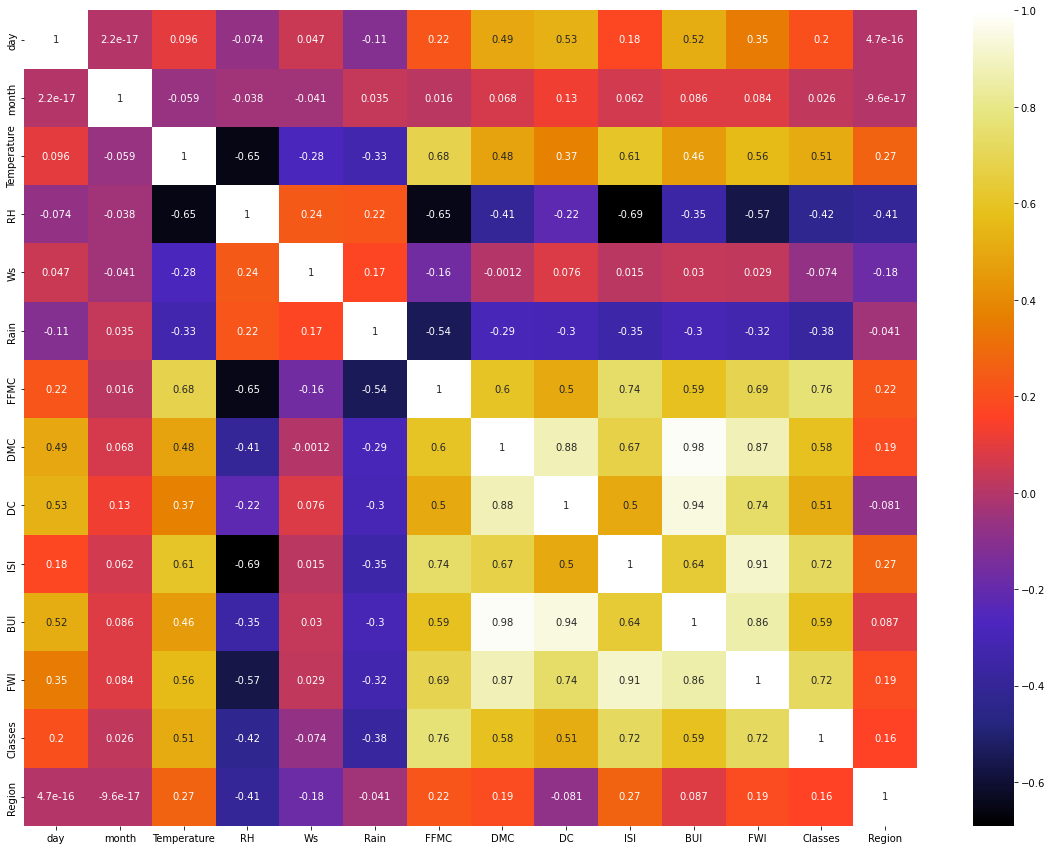

In [78]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),cmap="CMRmap", annot=True)

## <span style='color:Green '> Checking the distribution of all the features  </span>

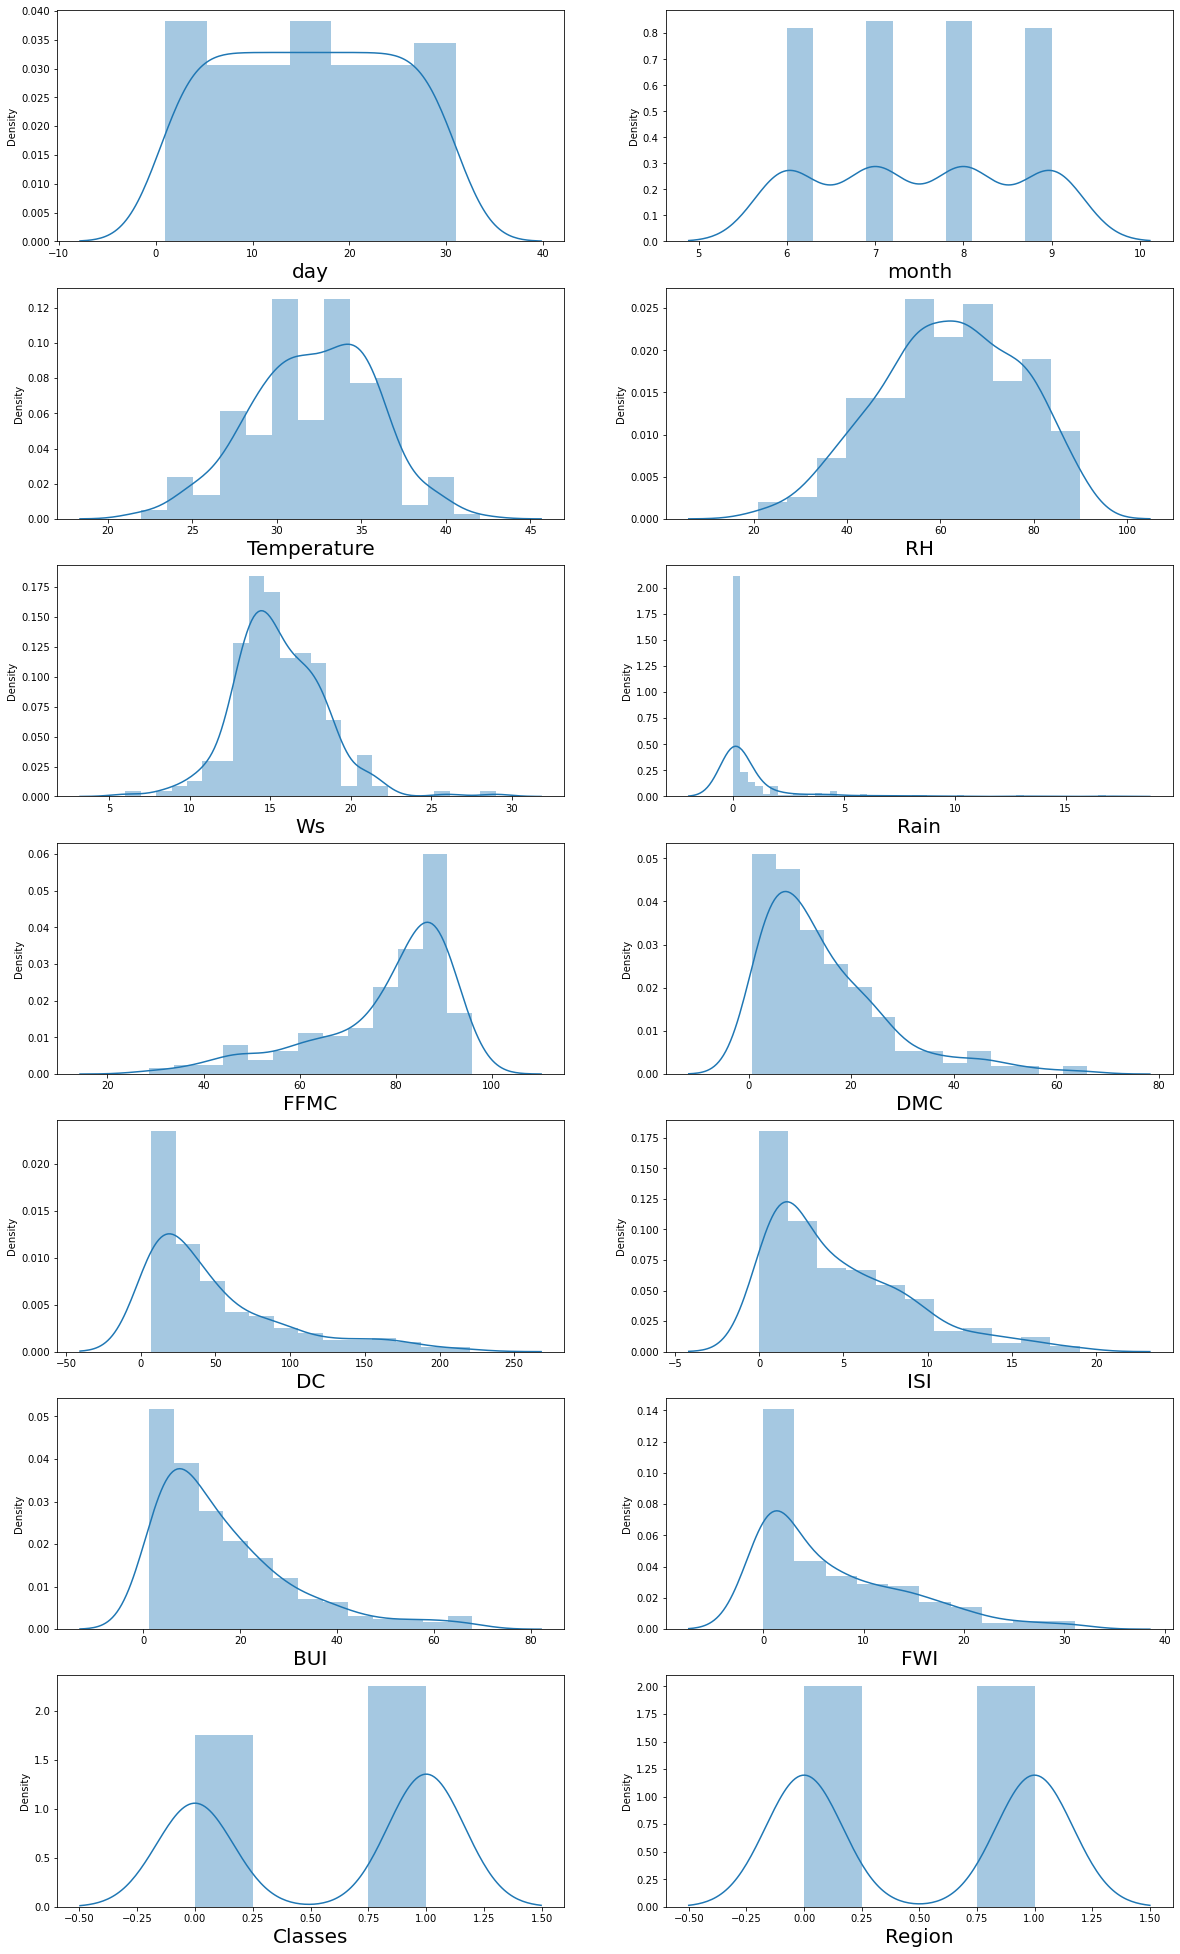

In [75]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#### <span style='color:blue'>Observation:</span>
* Rain,DMC,DC,ISI,BUI,FWI are rightly skewed(Log Normal Distribution)
* FFMC are left skewed
* day,month,Temperature,RH,Ws,Classes,Region are normally ditributed

## <span style='color:Green '> Multivariate Analysis</span>

<Figure size 1080x1080 with 0 Axes>

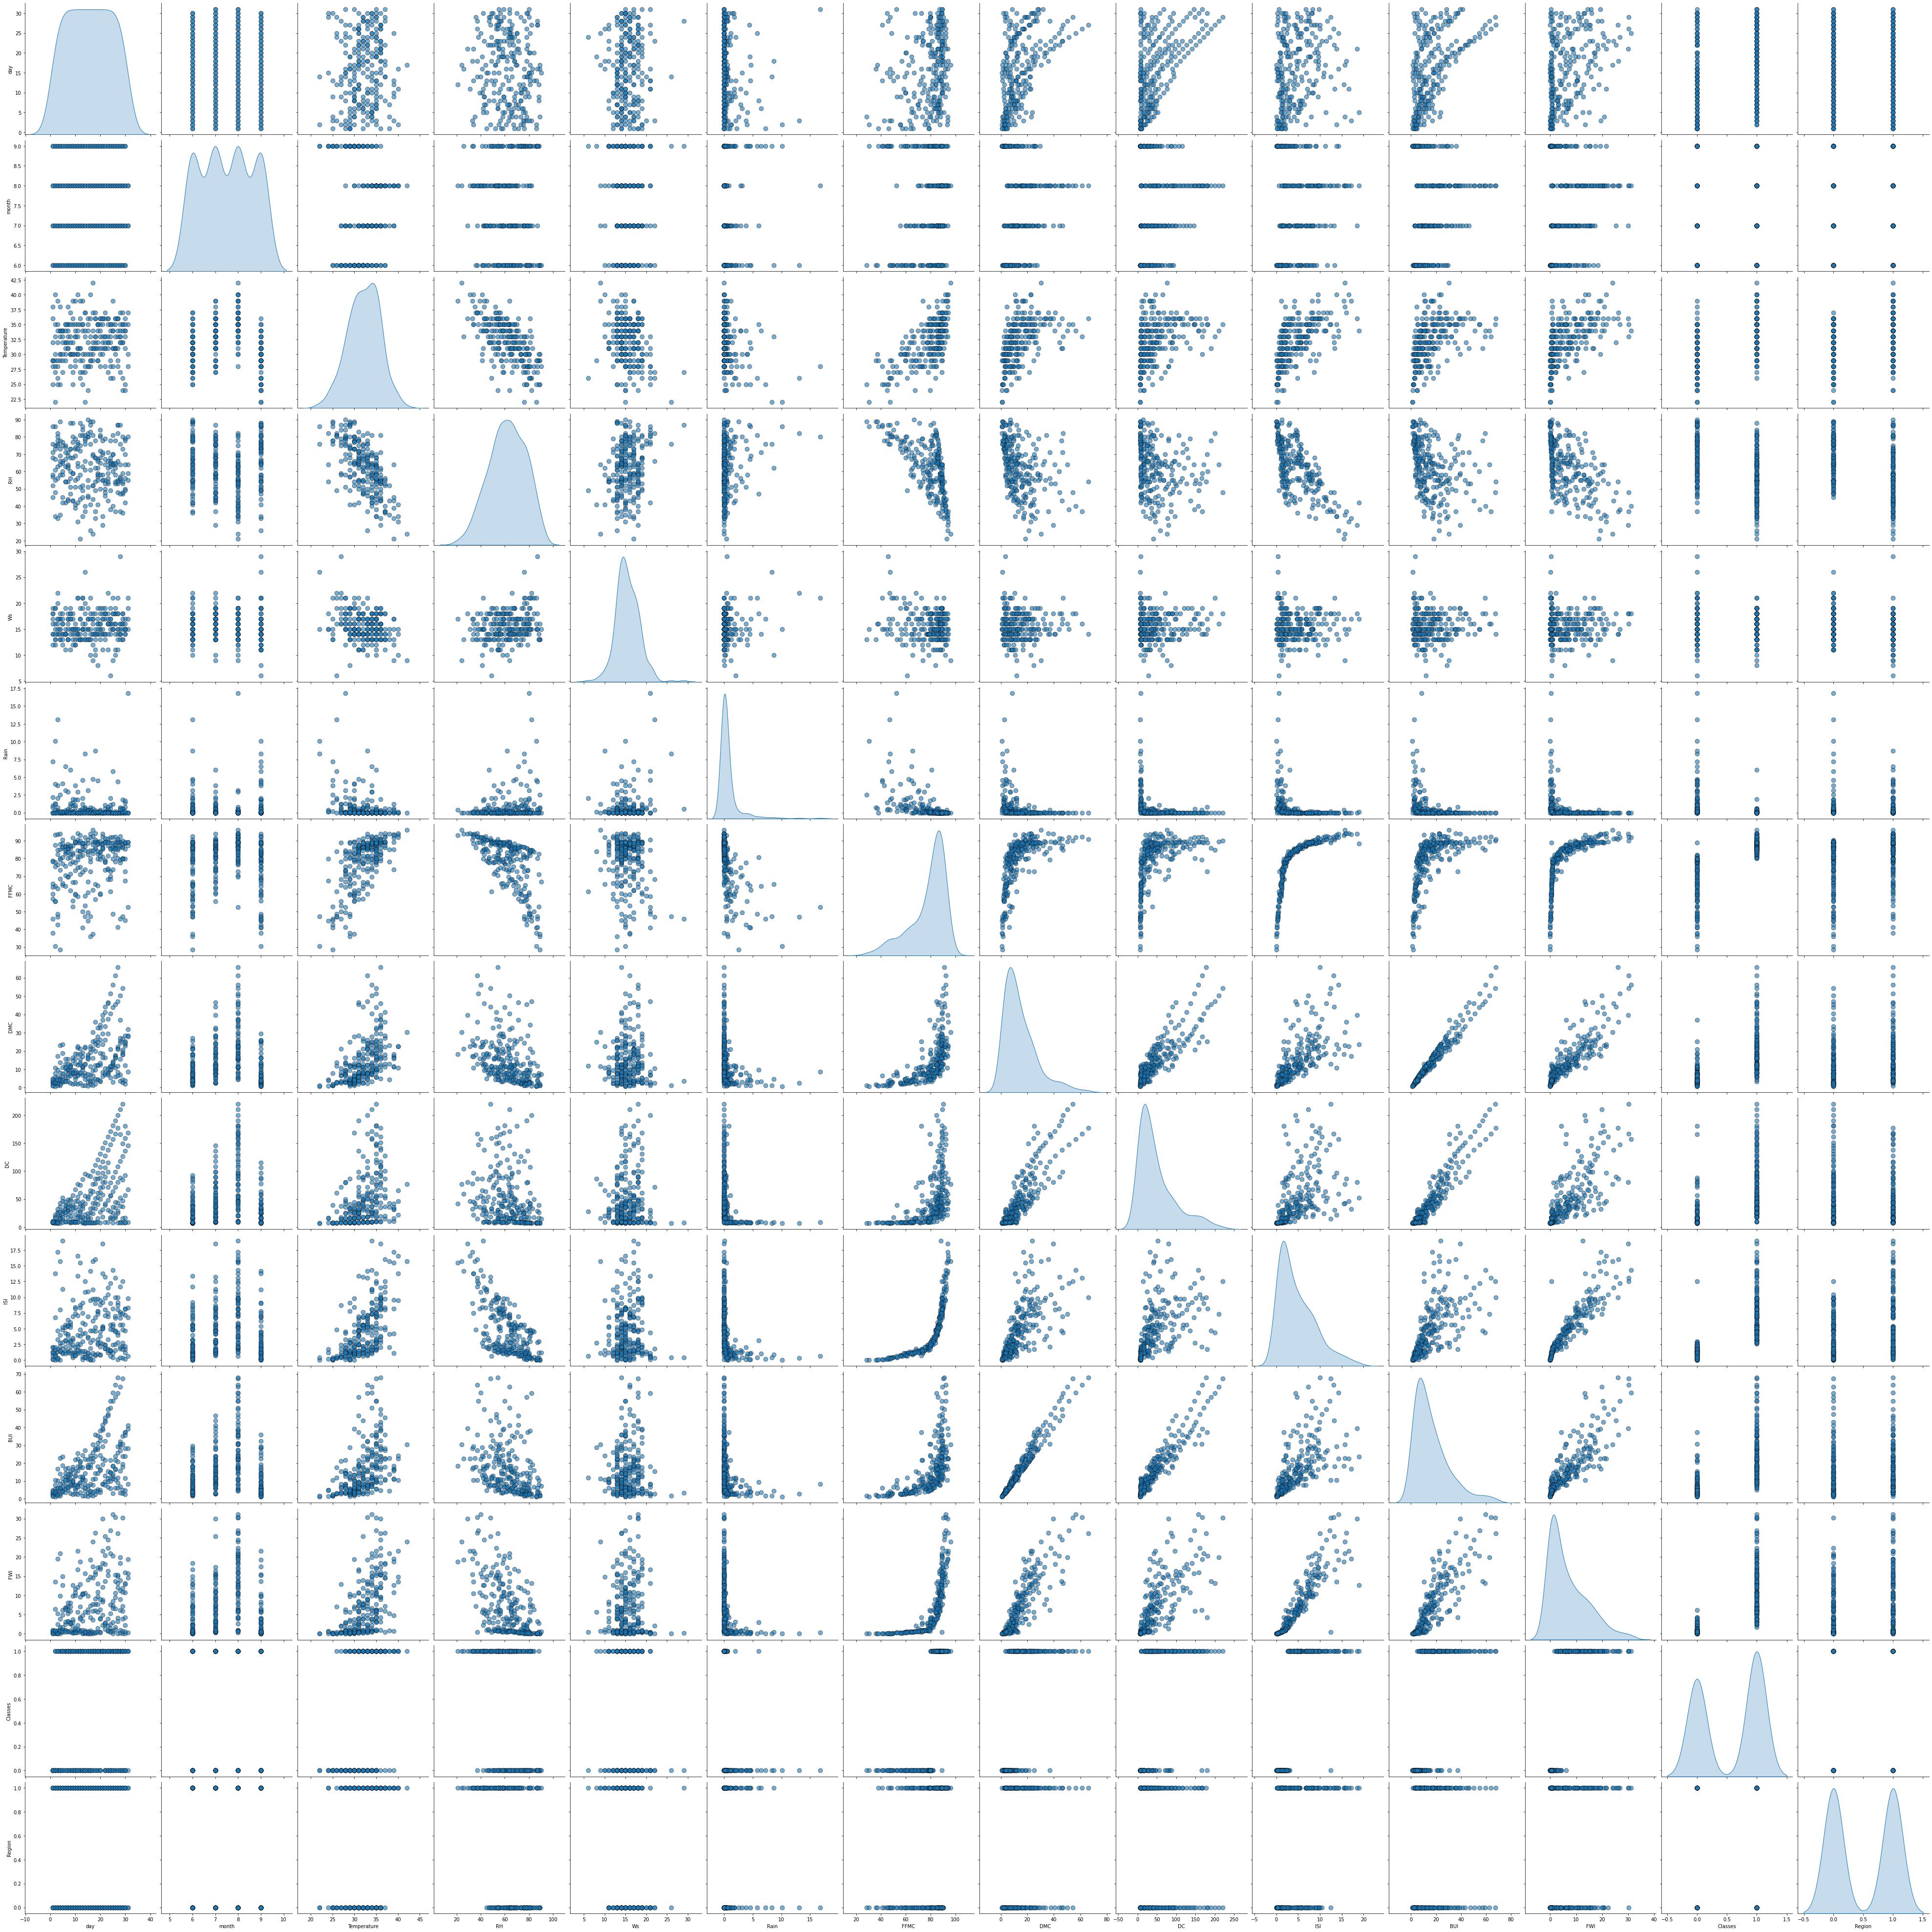

In [77]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(data,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

## <span style='color:Green '> Visualisation of Target Feature  </span>

In [79]:
data['Classes'].value_counts()

1    137
0    107
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Classes'>

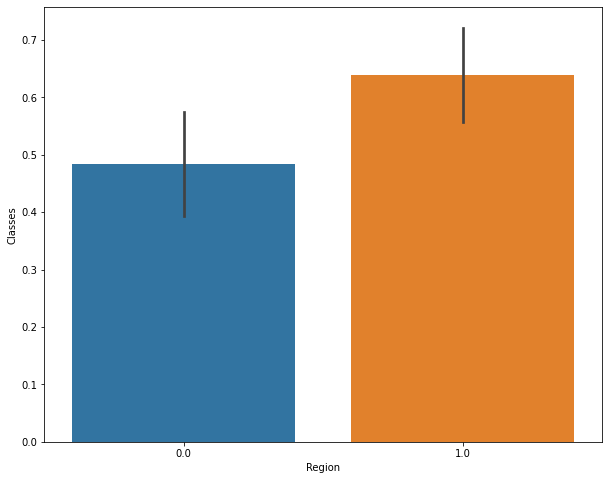

In [84]:
import matplotlib

matplotlib.rcParams['figure.figsize']=(10,8)
sns.barplot(x="Region",y="Classes",data=data)

#### <span style='color:blue'>Observation:</span>
* Sidi Bel-abbes Region has most fire occured
* Algeria Region has less fire occured

## <span style='color:Green '>  Visualisation of Temperature Feature  </span>

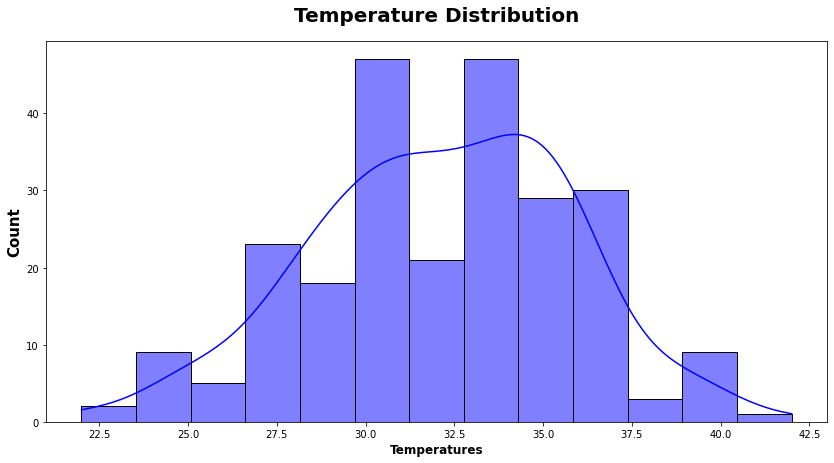

In [85]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Temperature, ec = "black", color='blue', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Temperatures", weight="bold", fontsize=12)
plt.show()

## <span style='color:Green '> Boxplot to find outliers  </span>


<AxesSubplot:>

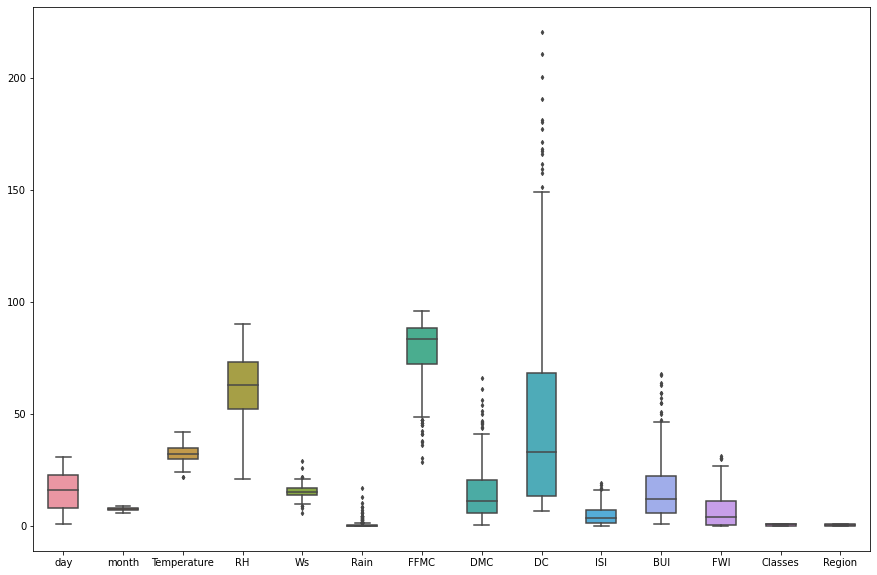

In [87]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

#### <span style='color:blue'>Observation:</span>
* Rain,DMC,DC,ISI,BUI,FWI has positive outliers
* Temperature, FFMC has negative outliers
* Ws hs positive and negative outliers
* day,month,RH has no outliers
* month colum has very less dispersion
* Classes and Region column has no dispersion

## <span style='color:Green '> Removing The Outliers </span>

In [104]:
def remove_outliers(data,colum):
    percentile_25 = np.percentile(data[colum],25)
    percentile_75 = np.percentile(data[colum],75)
    IQR = percentile_75 - percentile_25
    lower_fence = percentile_25 - 1.5*IQR
    higher_fence = percentile_75 + 1.5*IQR
    print("IQR:",IQR)
    print(f"Lower Fence [{colum}]:",lower_fence)
    print(f"Upper Fence [{colum}]:",higher_fence)
    print("_____________________________________________")
    data.loc[data[colum]<=lower_fence,colum] = lower_fence
    data.loc[data[colum]>=higher_fence,colum] = higher_fence

In [106]:
for colum in data.columns:
    remove_outliers(data,colum)

IQR: 15.0
Lower Fence [day]: -14.5
Upper Fence [day]: 45.5
_____________________________________________
IQR: 1.0
Lower Fence [month]: 5.5
Upper Fence [month]: 9.5
_____________________________________________
IQR: 5.0
Lower Fence [Temperature]: 22.5
Upper Fence [Temperature]: 42.5
_____________________________________________
IQR: 21.25
Lower Fence [RH]: 20.125
Upper Fence [RH]: 105.125
_____________________________________________
IQR: 3.0
Lower Fence [Ws]: 9.5
Upper Fence [Ws]: 21.5
_____________________________________________
IQR: 0.5
Lower Fence [Rain]: -0.75
Upper Fence [Rain]: 1.25
_____________________________________________
IQR: 16.224999999999994
Lower Fence [FFMC]: 47.73750000000001
Upper Fence [FFMC]: 112.63749999999999
_____________________________________________
IQR: 14.95
Lower Fence [DMC]: -16.624999999999996
Upper Fence [DMC]: 43.175
_____________________________________________
IQR: 54.87500000000001
Lower Fence [DC]: -69.03750000000002
Upper Fence [DC]: 150.462500

## <span style='color:Green '> Boxplot After Removing Outliers  </span>

<AxesSubplot:>

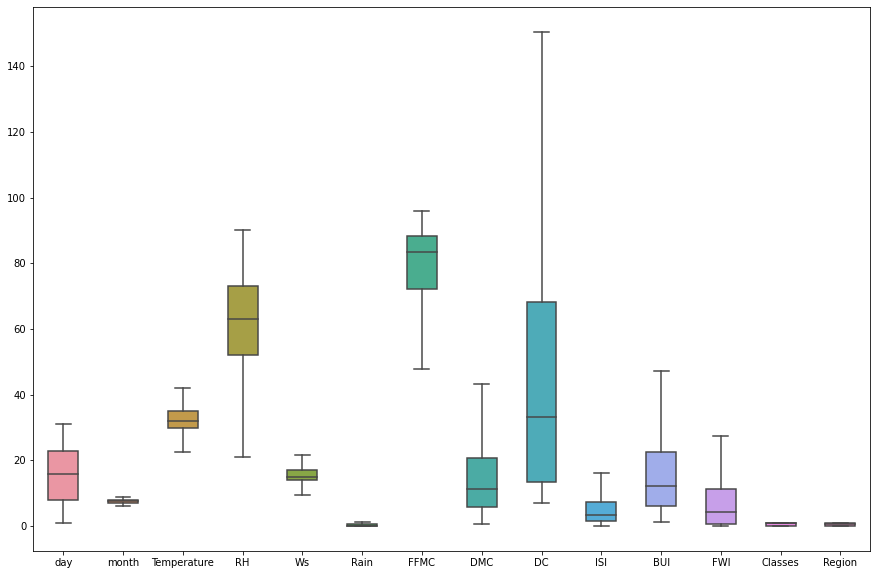

In [107]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

#### <span style='color:blue'>Observation:</span>
* After implementing remove_outlier() function now no outlier is avilable in every features

## <span style='color:Green '> Creating Independent and Dependent Features  </span>

In [108]:
X = data.drop(columns=['Classes'])
y = data['Classes']

### <span style='color:Green '> Independent Features  </span>

In [109]:
X

day  month  Temperature    RH    Ws  Rain     FFMC   DMC    DC  ISI  \
0     1.0    6.0         29.0  57.0  18.0  0.00  65.7000   3.4   7.6  1.3   
1     2.0    6.0         29.0  61.0  13.0  1.25  64.4000   4.1   7.6  1.0   
2     3.0    6.0         26.0  82.0  21.5  1.25  47.7375   2.5   7.1  0.3   
3     4.0    6.0         25.0  89.0  13.0  1.25  47.7375   1.3   6.9  0.0   
4     5.0    6.0         27.0  77.0  16.0  0.00  64.8000   3.0  14.2  1.2   
..    ...    ...          ...   ...   ...   ...      ...   ...   ...  ...   
239  26.0    9.0         30.0  65.0  14.0  0.00  85.4000  16.0  44.5  4.5   
240  27.0    9.0         28.0  87.0  15.0  1.25  47.7375   6.5   8.0  0.1   
241  28.0    9.0         27.0  87.0  21.5  0.50  47.7375   3.5   7.9  0.4   
242  29.0    9.0         24.0  54.0  18.0  0.10  79.7000   4.3  15.2  1.7   
243  30.0    9.0         24.0  64.0  15.0  0.20  67.3000   3.8  16.5  1.2   

      BUI  FWI  Region  
0     3.4  0.5     0.0  
1     3.9  0.4     0.0  
2     2.7  0.1     0.0  
3     1.7  0.0     0.0  
4     3.9  0.5     0.0  
..    ...  ...     ...  
239  16.9  6.5     1.0  
240   6.2  0.0     1.0  
241   3.4  0.2     1.0  
242   5.1  0.7     1.0  
243   4.8  0.5     1.0  

[244 rows x 13 columns]

### <span style='color:Green '> Dependent Features  </span>

In [110]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    1.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: Classes, Length: 244, dtype: float64

## <span style='color:Green '> Visualizing the relationship between our independent and dependent Features </span>

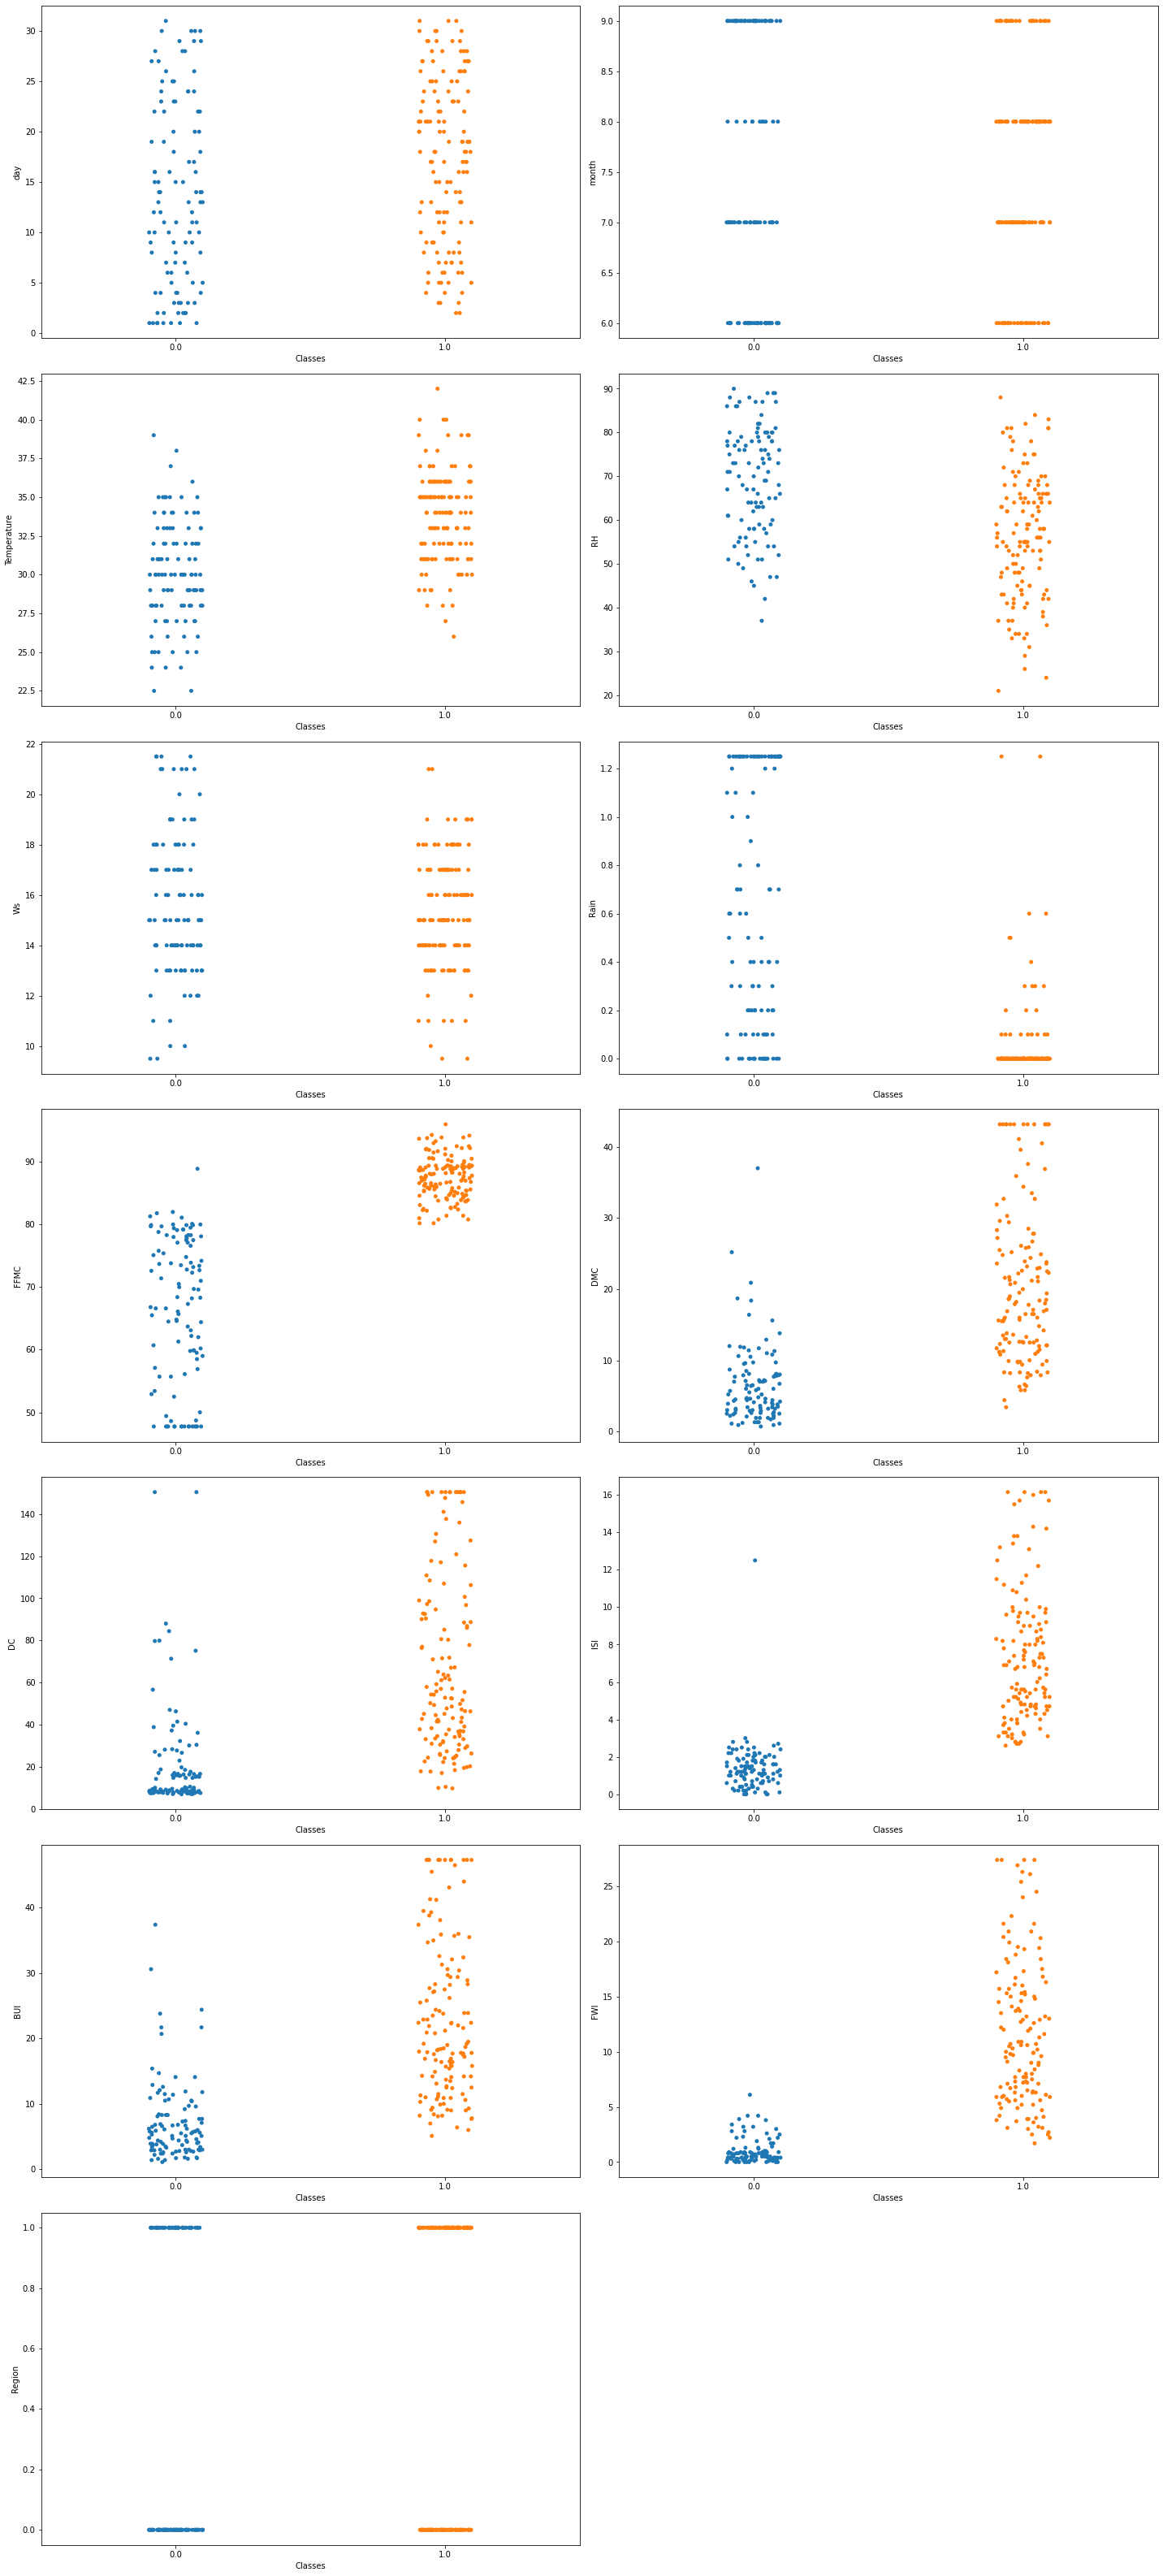

In [112]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

### <span style='color:Green '> Importing sklearn libraries for Machine Learning  </span>


In [113]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

### <span style='color:Green '> Scaling The Dataset  </span>

In [114]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### <span style='color:Green '> Train Test split  </span>

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

### <span style='color:Green '> Logistic Regression Model Training </span>

In [116]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

### <span style='color:Green '> Prediction </span>

In [117]:
y_pred = log_reg.predict(X_test)

In [118]:
y_pred

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

### <span style='color:Green '> Acuracy score  </span>

In [119]:
accuracy = accuracy_score(y_test,y_pred)

In [120]:
accuracy

0.9672131147540983

## <span style='color:Green '> Performance Metrics </span>


### <span style='color:Green '>  Confusion Metrics </span>

In [121]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[24,  0],
       [ 2, 35]], dtype=int64)

In [122]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

### <span style='color:Green '> Breaking down the formula for Accuracy </span>

In [123]:
# Breaking Down the formula for accuracy
Accuracy = (true_positive+true_negative) / (true_positive+false_positive+false_negative+true_negative)

In [124]:
Accuracy

0.9672131147540983

### <span style='color:Green '> Precision </span>

In [125]:
# Precision
Precision = (true_positive) / (true_positive+false_positive)
Precision

1.0

### <span style='color:Green '> Recall  </span>

In [126]:
# Recall
Recall = (true_positive) / (true_positive+false_negative)
Recall

0.9230769230769231

### <span style='color:Green '>  F1 Score </span>

In [127]:
# F-1 score
F1_score = (2 * (Precision * Recall)) / (Precision + Recall)
F1_score

0.9600000000000001

# <span style='color:red '> Creating Imbalance Dataset From The Original Balanced Dataset  </span>

In [128]:
df.head()

day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes  Region  
0        0     0.0  
1        0     0.0  
2        0     0.0  
3        0     0.0  
4        0     0.0

In [129]:
df.shape

(244, 14)

In [130]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### <span style='color:green'>Splitting The Data in 90:10 percent ratio using train test split</span>

In [131]:
### Creating imbalance
X1 = pd.DataFrame(df,columns=['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI', 'Region'])
y1 = pd.DataFrame(df,columns=['Classes'])

In [132]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [134]:
X_train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
156    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
183    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
130    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  
156  15.0     1.0  
183   0.8     1.0  
11    7.1     0.0  
75    6.3     0.0  
130   1.9     1.0

In [138]:
X_train_imb.shape

(219, 13)

In [136]:
y_train_imb.head()

Classes
156        1
183        0
11         1
75         1
130        0

In [139]:
y_train_imb.shape

(219, 1)

In [135]:
X_test_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
48    19      7           35  59  17   0.0  88.1  12.0   52.8  7.7  18.2   
216    3      9           28  75  16   0.0  82.2   4.4   24.3  3.3   6.0   
101   10      9           33  73  12   1.8  59.9   2.2    8.9  0.7   2.7   
38     9      7           32  68  14   1.4  66.6   7.7    9.2  1.1   7.4   
86    26      8           31  78  18   0.0  85.8  45.6  190.6  4.7  57.1   

      FWI  Region  
48   10.9     0.0  
216   2.5     1.0  
101   0.3     0.0  
38    0.6     0.0  
86   13.7     0.0

In [140]:
X_test_imb.shape

(25, 13)

In [137]:
y_test_imb.head()

Classes
48         1
216        1
101        0
38         0
86         1

In [141]:
y_test.shape

(61,)

### <span style='color:Green '> Replacing All Values as ` 1 ` in y_train And All Values as ` 0 ` in y_test To Create Imbalance  </span>

In [142]:
y_train_imb = y_train_imb.replace(0,1)
y_train_imb.head()

Classes
156        1
183        1
11         1
75         1
130        1

In [143]:
y_test_imb = y_test_imb.replace(1,0)
y_test_imb.head()

Classes
48         0
216        0
101        0
38         0
86         0

In [144]:
X_train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
156    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
183    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
130    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  
156  15.0     1.0  
183   0.8     1.0  
11    7.1     0.0  
75    6.3     0.0  
130   1.9     1.0

### <span style='color:Green '> Combining X_train_imb and y_train_imb</span>

In [145]:
train_imb=X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
156    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
183    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
130    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  Classes  
156  15.0     1.0        1  
183   0.8     1.0        1  
11    7.1     0.0        1  
75    6.3     0.0        1  
130   1.9     1.0        1

### <span style='color:Green '> Combining X_test_imb and y_test_imb</span>

In [146]:
test_imb=X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
48    19      7           35  59  17   0.0  88.1  12.0   52.8  7.7  18.2   
216    3      9           28  75  16   0.0  82.2   4.4   24.3  3.3   6.0   
101   10      9           33  73  12   1.8  59.9   2.2    8.9  0.7   2.7   
38     9      7           32  68  14   1.4  66.6   7.7    9.2  1.1   7.4   
86    26      8           31  78  18   0.0  85.8  45.6  190.6  4.7  57.1   

      FWI  Region  Classes  
48   10.9     0.0        0  
216   2.5     1.0        0  
101   0.3     0.0        0  
38    0.6     0.0        0  
86   13.7     0.0        0

### <span style='color:Green '> Checking the shape of imbalanced Data</span>

In [147]:
train_imb.shape, test_imb.shape

((219, 14), (25, 14))

### <span style='color:Green '> Combining train_imb dataset and test_imb dataset into new data_imb dataset </span>

In [151]:
df_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)

In [155]:
df_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   0.8   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

In [156]:
df_imb.shape

(244, 14)

### <span style='color:Green '> Checking The Imbalancing </span>

In [157]:
df_imb['Classes'].value_counts()

1    219
0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

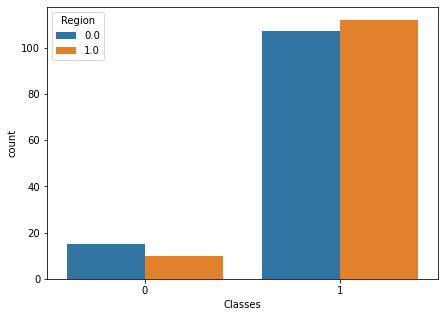

In [158]:
## 0.0 is 'Bejaia' and 1.0 is 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data=df_imb,x='Classes',hue='Region')

#### <span style='color:blue'>Observation:</span>
* In Bejia Region Fire Not Occured maximum then Sidi Bel-abbes Region
* In Sidi Bel-abbes Region Fire Occured minimum then Bejia Region

# <span style='color:red'> Logistic Regression on Imbalanced Dataset  </span>

In [159]:
df_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   0.8   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## <span style='color:Green '> Separating Independent and Dependent feature  </span>

In [160]:
X1 = df_imb.drop(columns = ['Classes'])
y1 = df_imb['Classes']

In [161]:
X1.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   0.8   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  
0     1.0  
1     1.0  
2     0.0  
3     0.0  
4     1.0

In [162]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32

## <span style='color:green '>Handling Imbalance dataset by Doing Upsampling</span>

In [163]:
### for upsampling 
from imblearn.combine import SMOTETomek

In [164]:
smk=SMOTETomek()
smk

SMOTETomek()

In [165]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [166]:
X_bal.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   0.8   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  
0     1.0  
1     1.0  
2     0.0  
3     0.0  
4     1.0

In [167]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32

In [168]:
X_bal.shape,y_bal.shape

((422, 13), (422,))

### <span style='color:green '>Creating Balanced Data From Imbalanced Data</span>

In [169]:
data_bal=X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    1      8           38  52  14   0.0  78.3   4.4  10.5   2.0   4.4   0.8   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## <span style='color:Green '> EDA on balanced Dataset  </span>

In [170]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          422 non-null    int32  
 1   month        422 non-null    int32  
 2   Temperature  422 non-null    int32  
 3   RH           422 non-null    int32  
 4   Ws           422 non-null    int32  
 5   Rain         422 non-null    float64
 6   FFMC         422 non-null    float64
 7   DMC          422 non-null    float64
 8   DC           422 non-null    float64
 9   ISI          422 non-null    float64
 10  BUI          422 non-null    float64
 11  FWI          422 non-null    float64
 12  Region       422 non-null    float64
 13  Classes      422 non-null    int32  
dtypes: float64(8), int32(6)
memory usage: 36.4 KB


## <span style='color:Green '> Statistical analysis on Balanced Dataset </span>

In [171]:
data_bal.describe().T

count       mean        std   min        25%        50%  \
day          422.0  14.843602   8.760427   1.0   7.000000  15.000000   
month        422.0   7.438389   1.005800   6.0   7.000000   7.000000   
Temperature  422.0  32.139810   3.232389  22.0  30.000000  32.000000   
RH           422.0  62.343602  13.617369  21.0  54.000000  64.000000   
Ws           422.0  15.606635   2.558903   6.0  14.000000  16.000000   
Rain         422.0   0.527574   1.562509   0.0   0.000000   0.000000   
FFMC         422.0  78.909110  12.700596  28.6  72.721145  84.001719   
DMC          422.0  15.675293  13.541302   0.7   5.191713  12.500000   
DC           422.0  54.995807  50.371267   6.9  15.700000  39.750625   
ISI          422.0   4.849114   3.833228   0.0   1.555018   4.250000   
BUI          422.0  18.161363  15.543262   1.1   5.635120  15.150000   
FWI          422.0   7.432290   7.261846   0.0   0.789216   5.716978   
Region       422.0   0.439532   0.460700   0.0   0.000000   0.179639   
Classes      422.0   0.500000   0.500593   0.0   0.000000   0.500000   

                   75%    max  
day          23.000000   31.0  
month         8.000000    9.0  
Temperature  34.000000   42.0  
RH           72.000000   90.0  
Ws           17.000000   29.0  
Rain          0.372433   16.8  
FFMC         88.100000   96.0  
DMC          20.900000   65.9  
DC           84.925000  220.4  
ISI           7.443199   19.0  
BUI          24.096260   68.0  
FWI          12.811597   31.1  
Region        1.000000    1.0  
Classes       1.000000    1.0

In [172]:
data_bal.corr()

day     month  Temperature        RH        Ws      Rain  \
day          1.000000 -0.089247     0.175416 -0.116308  0.123235 -0.077839   
month       -0.089247  1.000000    -0.118259  0.067017 -0.009439  0.027578   
Temperature  0.175416 -0.118259     1.000000 -0.655457 -0.294003 -0.277721   
RH          -0.116308  0.067017    -0.655457  1.000000  0.225974  0.187243   
Ws           0.123235 -0.009439    -0.294003  0.225974  1.000000  0.098724   
Rain        -0.077839  0.027578    -0.277721  0.187243  0.098724  1.000000   
FFMC         0.291037  0.015883     0.668940 -0.606752 -0.063632 -0.520617   
DMC          0.591852  0.011413     0.402559 -0.303095  0.141673 -0.244774   
DC           0.633774  0.063393     0.329334 -0.176025  0.231989 -0.271979   
ISI          0.294551  0.031744     0.631590 -0.672811  0.051262 -0.328675   
BUI          0.620466  0.024570     0.390492 -0.264163  0.179923 -0.260447   
FWI          0.473051  0.036526     0.553585 -0.531690  0.109826 -0.302209   
Region       0.004557  0.041334     0.216782 -0.397317 -0.127916 -0.012269   
Classes      0.119160  0.002359    -0.037433 -0.021430 -0.057483  0.205534   

                 FFMC       DMC        DC       ISI       BUI       FWI  \
day          0.291037  0.591852  0.633774  0.294551  0.620466  0.473051   
month        0.015883  0.011413  0.063393  0.031744  0.024570  0.036526   
Temperature  0.668940  0.402559  0.329334  0.631590  0.390492  0.553585   
RH          -0.606752 -0.303095 -0.176025 -0.672811 -0.264163 -0.531690   
Ws          -0.063632  0.141673  0.231989  0.051262  0.179923  0.109826   
Rain        -0.520617 -0.244774 -0.271979 -0.328675 -0.260447 -0.302209   
FFMC         1.000000  0.583972  0.539342  0.770598  0.588278  0.717076   
DMC          0.583972  1.000000  0.896009  0.637311  0.985309  0.859882   
DC           0.539342  0.896009  1.000000  0.529790  0.952772  0.771314   
ISI          0.770598  0.637311  0.529790  1.000000  0.620195  0.911842   
BUI          0.588278  0.985309  0.952772  0.620195  1.000000  0.853814   
FWI          0.717076  0.859882  0.771314  0.911842  0.853814  1.000000   
Region       0.186764  0.173322 -0.075423  0.256525  0.078340  0.188283   
Classes     -0.124829 -0.125616 -0.179001 -0.056276 -0.156040 -0.114355   

               Region   Classes  
day          0.004557  0.119160  
month        0.041334  0.002359  
Temperature  0.216782 -0.037433  
RH          -0.397317 -0.021430  
Ws          -0.127916 -0.057483  
Rain        -0.012269  0.205534  
FFMC         0.186764 -0.124829  
DMC          0.173322 -0.125616  
DC          -0.075423 -0.179001  
ISI          0.256525 -0.056276  
BUI          0.078340 -0.156040  
FWI          0.188283 -0.114355  
Region       1.000000  0.167456  
Classes      0.167456  1.000000

In [173]:
num_bal_col=[feature for feature in data_bal.columns if data_bal[feature].dtype != 'O']
num_bal_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes']

## <span style='color:Green '> Compairing the feature for Original and Balanced Dataset  </span>

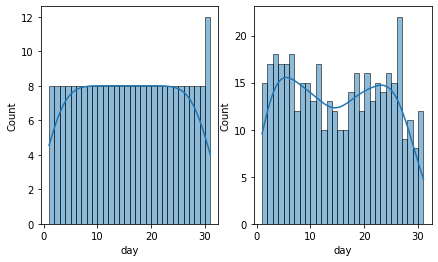

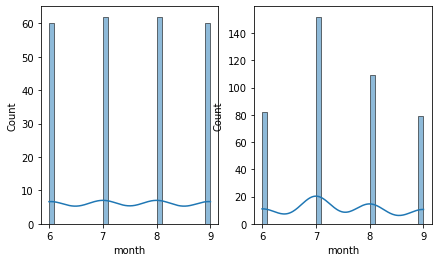

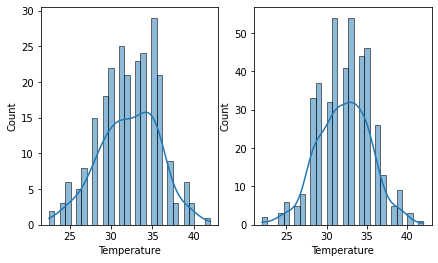

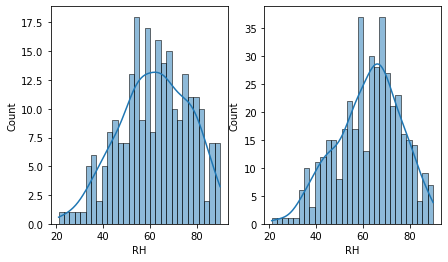

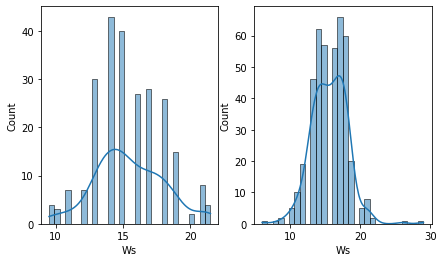

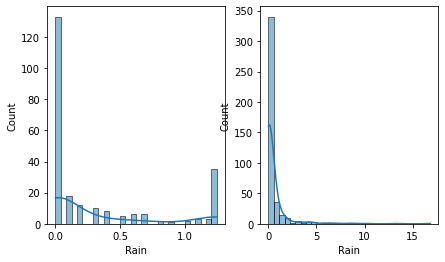

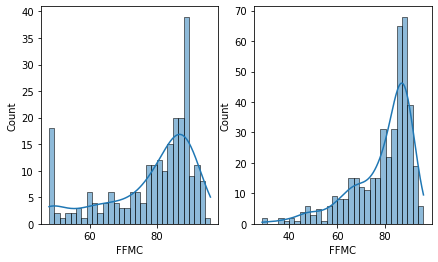

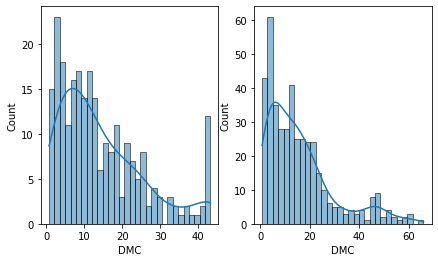

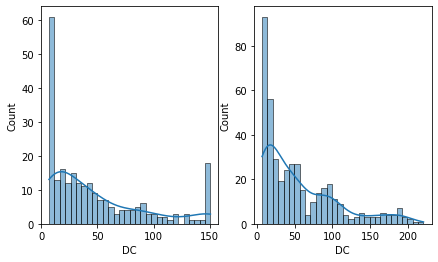

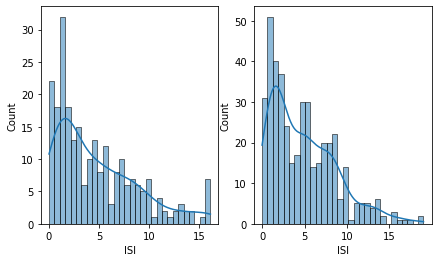

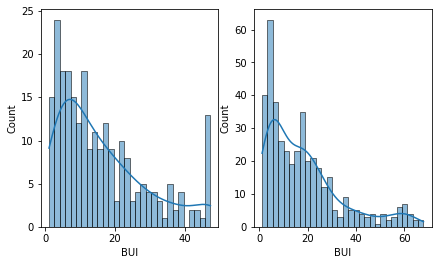

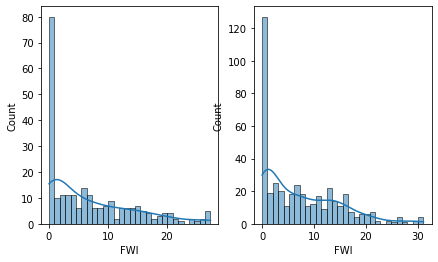

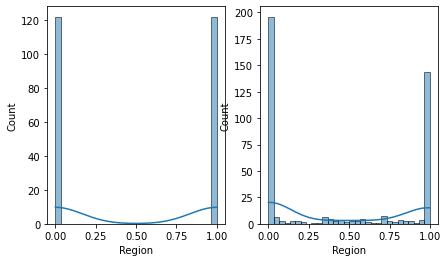

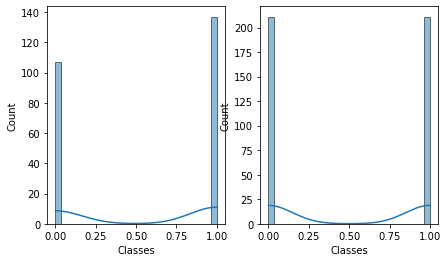

In [175]:
for i in num_bal_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.histplot(data=data,x=i,kde=True,bins=30)
    
    
    plt.subplot(122)
    sns.histplot(data=data_bal,x=i,kde=True,bins=30)

## <span style='color:Green '> Checking the Outliers for Original and Balanced Dataset  </span>

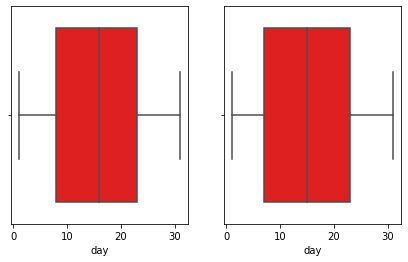

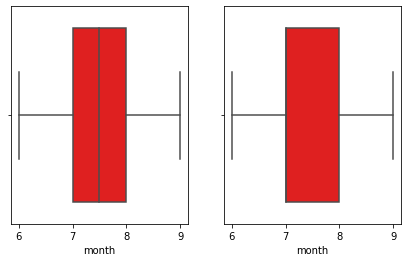

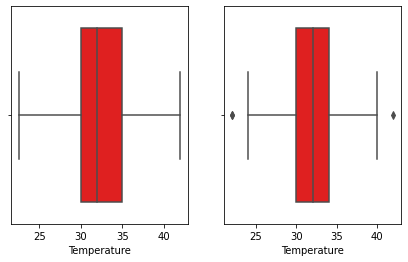

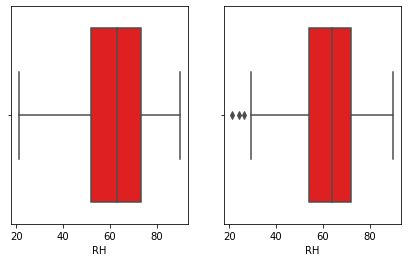

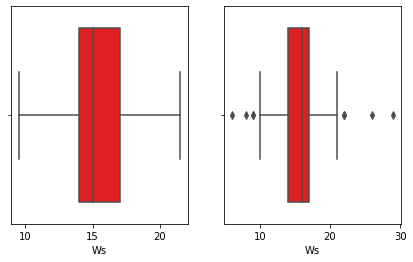

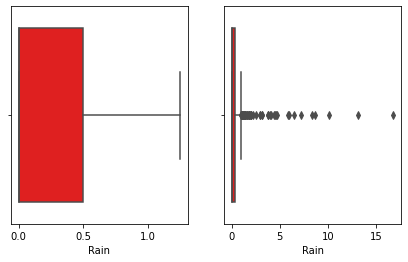

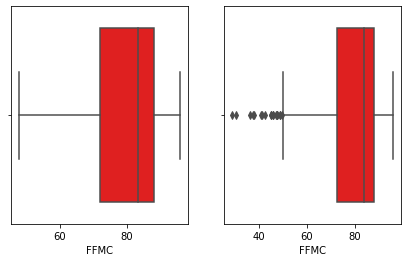

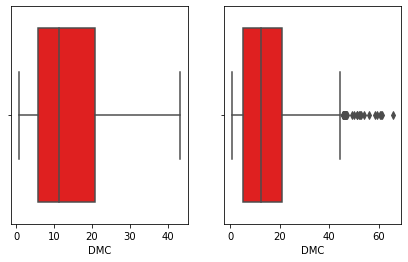

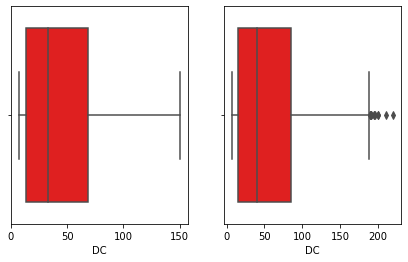

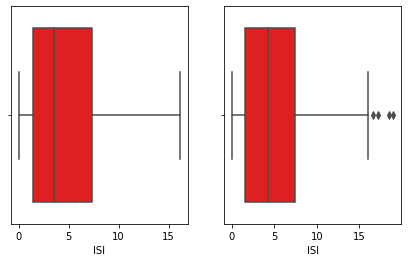

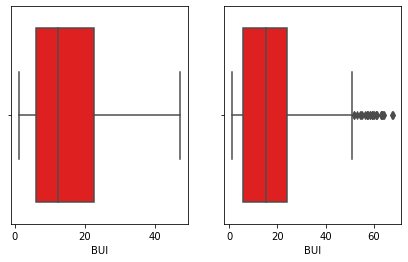

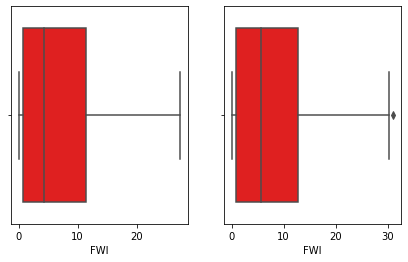

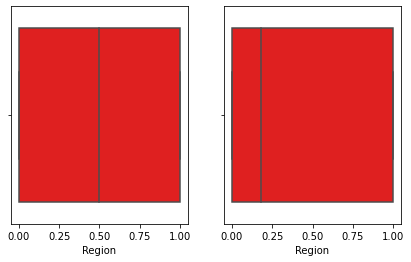

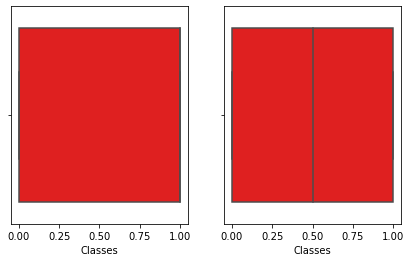

In [177]:
for i in num_bal_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.boxplot(data=data,x=i,color='r')
    
    
    plt.subplot(122)
    sns.boxplot(data=data_bal,x=i,color='r')

### <span style='color:Green '> Scaling The Dataset  </span>

In [178]:
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X_bal)

### <span style='color:Green '> Train Test Split  </span>

In [179]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_scaled1,y_bal,test_size=0.30,random_state=16)

In [181]:
X_train1

array([[ 1.27501095,  0.55903535,  0.26643158, ...,  2.91006169,
         2.82149108,  0.91264077],
       [ 1.61786649,  0.55903535,  0.88590335, ...,  3.17160453,
         3.13897225, -0.95518491],
       [-1.46783334, -0.4363778 ,  0.26643158, ..., -0.66740569,
        -0.14232131,  1.21800084],
       ...,
       [-1.01069262, -0.4363778 , -0.04330431, ..., -0.36466495,
        -0.08717352, -0.95518491],
       [ 1.27501095, -1.43179095, -0.35304019, ...,  0.17905643,
        -0.23414832, -0.95518491],
       [ 0.70358506, -0.4363778 ,  0.26643158, ...,  0.27302299,
         0.18856543, -0.95518491]])

## <span style='color:Green '> Logistic Regression Model  </span>

In [182]:
from sklearn.linear_model import LogisticRegression
classifier_bal=LogisticRegression()
classifier_bal.fit(X_train1,y_train1)

LogisticRegression()

## <span style='color:Green '> Prediction  </span>

In [183]:
y_pred1 = classifier_bal.predict(X_test1)

In [184]:
y_pred1

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

## <span style='color:Green '> Acurracy  </span>

In [185]:

from sklearn.metrics import accuracy_score,classification_report
bal_score=accuracy_score(y_pred1,y_test1)
print(bal_score)

0.6299212598425197


## <span style='color:Red '> Performance Metrics  </span>

### <span style='color:Green '> Confusion Metrics </span>

In [186]:
conf_mat_bal=confusion_matrix(y_pred1,y_test1)

In [187]:
conf_mat_bal

array([[44, 28],
       [19, 36]], dtype=int64)

In [188]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]

### <span style='color:Green '> Precision </span> 

In [189]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

0.6111111111111112

## <span style='color:Green '> Recall  </span>

In [190]:
bal_recall = true_positive/(true_positive+false_negative)
bal_recall

0.6984126984126984

## <span style='color:Green '> F1 score  </span>

In [191]:
F1_Score_bal = 2*(bal_recall * bal_Precision) / (bal_recall + bal_Precision)
F1_Score_bal

0.6518518518518519

### <span style='color:blue'>Observation</span>

* It seems that model is good when we predict from original dataset

* It seems that model is very bad when we try to predict from balanced(created from an imbalanced dataset )

# <span style='color:red'>Thank You</span>